In [13]:
import pandas as pd
import ipaddress
import seaborn as sns
import pycountry
import gmplot
import matplotlib.pyplot as plt
ip_reputation_df = pd.read_csv("AlienVault_IP_reputation.csv")
ip_reputation_df.value_counts(normalize=True)# task 1

Unnamed: 0  IP              Reliability  Risk  Type           Country  Locale         Coords                      
0           222.76.212.189  4            2     Scanning Host  cn       Xiamen         24.4797992706,118.08190155      0.00014
6771        190.6.141.3     4            4     Scanning Host  do       Santo Domingo  18.4666996002,-69.9000015259    0.00014
6782        190.6.141.58    4            4     Scanning Host  do       Santo Domingo  18.4666996002,-69.9000015259    0.00014
6781        190.6.141.54    4            4     Scanning Host  do       Santo Domingo  18.4666996002,-69.9000015259    0.00014
6780        190.6.141.55    4            4     Scanning Host  do       Santo Domingo  18.4666996002,-69.9000015259    0.00014
                                                                                                                       ...   
3521        129.177.205.29  4            2     Scanning Host  no       Bergen         60.3911018372,5.32469987869     0.00014
352

In [17]:
ip_list1 = []
ip_list2 = []
ip_sub = []
def ip_is_in_cidr(ip_add, cidr):
    IP_add_list= [str(ip) for ip in ipaddress.IPv4Network(cidr)]
    if ip_add in IP_add_list:
        return True
    else:
        return False

for ip in ipaddress.IPv4Network('222.76.212.0/24'):
    ip_sub.append(ip)
    
for ip in ip_reputation_df["IP"]:
    bol = ip_is_in_cidr(ip, '222.76.212.0/24')
    if bol == True:
        ip_list1.append(ip)
    bol = ip_is_in_cidr(ip, '5.34.246.0/24')
    if bol == True:
        ip_list2.append(ip)
        
len(ip_list1) + len(ip_list2) # task 2
len(ip_sub)

256

In [5]:
data_df = ip_reputation_df[ip_reputation_df.IP.isin(ip_list1)]
total = sum(data_df['Risk']) / 22
total


2.090909090909091

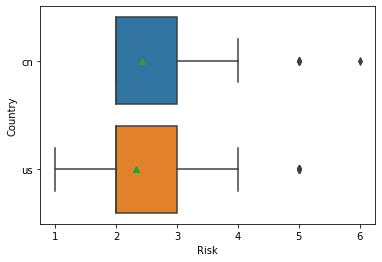

In [6]:
new_data =  ip_reputation_df[ip_reputation_df.Country.isin(["us","cn"])]
sns.boxplot(x=new_data['Risk'], y=new_data['Country'], showmeans=True);
#task 4


In [7]:
countries = ['gb','mx','pk','ru','ua']
new_country_data = ip_reputation_df[ip_reputation_df.Country.isin(countries)]
new_country_data.shape # task 5


(1108, 8)

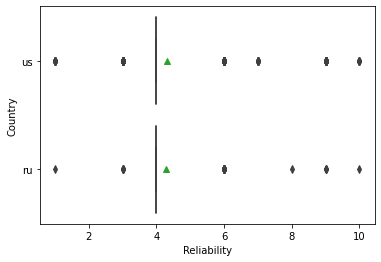

In [8]:
new_data2 =  ip_reputation_df[ip_reputation_df.Country.isin(["us","ru"])]
sns.boxplot(x=new_data2['Reliability'], y=new_data2['Country'], showmeans=True);
# task 6


In [12]:
lat_list = []
long_list= []
for coord in ip_reputation_df['Coords']:
    lat_long = coord.split(',')
    lat= lat_long[0]
    lon = lat_long[1]
    lat_list.append(float(lat))
    long_list.append(float(lon))

ip_reputation_df['lat'] = lat_list
ip_reputation_df['lon'] = long_list
aust_coords = ip_reputation_df[ip_reputation_df.Country.isin(['au'])]

lat_list = aust_coords['lat']
lon_list = aust_coords['lon']

gmap = gmplot.GoogleMapPlotter(0, 0, 2)
gmap.heatmap(lat_list, lon_list)
gmap.draw(r"C:\Users\IsaacStertzbach\Desktop\AUmap.html")
# Task 7


In [10]:
us_data = ip_reputation_df[ip_reputation_df.Country.isin(['us'])]
cn_data = ip_reputation_df[ip_reputation_df.Country.isin(['cn'])]
de_data = ip_reputation_df[ip_reputation_df.Country.isin(['de'])]

us_data['Type'].value_counts() # Scanning Host, Spamming, Malware IP
cn_data['Type'].value_counts() # Scanning Host, Malicious Host, Malware Domain
de_data['Type'].value_counts() # Scanning Host, Malware Domain, Malware IP
# Task 8

Scanning Host                          381
Malware Domain                          20
Malware IP                              14
Spamming                                 5
Malicious Host                           3
Malicious Host;Scanning Host             2
Malware Domain;Malware IP                1
Malware distribution;Malicious Host      1
C&C                                      1
Name: Type, dtype: int64

In [38]:
data_risk_avg = ip_reputation_df.groupby('Country')['Risk'].mean()
data_risk_avg.sort_values(ascending=False)

Country
ma    6.0
sa    5.0
az    5.0
by    5.0
ae    4.5
     ... 
kz    2.0
hu    2.0
ge    2.0
fi    2.0
ee    2.0
Name: Risk, Length: 73, dtype: float64

In [32]:
data_risk_avg = ip_reputation_df.groupby('Country')['Reliability'].mean()
data_risk_avg.sort_values(ascending=False)

Country
fi    9.000000
hu    6.500000
by    6.000000
vg    6.000000
cy    6.000000
        ...   
at    3.000000
ch    2.500000
it    2.448276
mx    1.800000
tw    1.764192
Name: Reliability, Length: 73, dtype: float64